# Part I

## T-distribution converges to normal distribution

As the degrees of freedom increases the t-distribution converges to the nomral distribution

In [3]:
from scipy.stats import t, norm
import matplotlib.pyplot as plt
import numpy as np

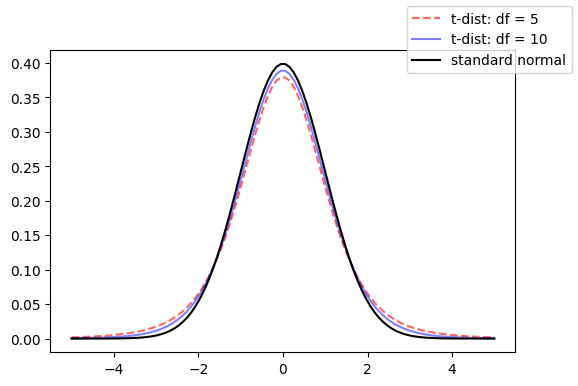

In [7]:
_min, _max = -5, 5
x = np.linspace(_min, _max, 100)

fig, ax = plt.subplots(1, 1)
fig.dpi = 100

df = 5
y = t.pdf(x, df)
ax.plot(x, y, 'r--', alpha=0.6, label=f't-dist: df = {df}')

df = 10
y = t.pdf(x, df)
ax.plot(x, y, 'b-', alpha=0.5, label=f't-dist: df = {df}')

y = norm.pdf(x, 0, 1)
ax.plot(x, y, 'k-', label='standard normal')

fig.show()
fig.legend()

## Monte Carlo Inegration

**Task**: Use Monte Carlo integration to calculate the CDF of a t-distribution at b; i.e., CDF(b)

We can estimate any integration (not just CDF)

$$ I = \int_{a}^{b} f(x) dx $$

with Monte Carlo integration
$$ \hat{I} =  \frac{(b-a)}{n} \sum_{1}^{n} f(U(a,b)) $$ 

where $U(a,b)$ is a random uniform number between $a$ and $b$, $n$ is th number samples (simulation size), and $f()$ is any function, e.g., the PDF of a t-distribution.

In [10]:
df = 10
a = -100
b = -1
n = 10**6
x = np.random.uniform(a, b, n) 
monte_carlo_integration = np.mean(t.pdf(x, df)) * (b - a)
print(monte_carlo_integration)

0.16887503034579254


We can confirm that the calculation was right by looking at the inverse of the CDF (called percent point function or `ppf`)

In [13]:
t.ppf(monte_carlo_integration, df)

-1.0068454475914492

Let's also confirm the results by using the CDF function in `scipy`

In [12]:
t.cdf(b, df)

0.17044656615103004